# Step 1: Instruction Fine-Tuning GPT-2

In [ ]:
!pip install datasets #ÌóàÍπÖÌéòÏù¥Ïä§
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling, pipeline, \
                         AutoTokenizer, AutoModelForCausalLM
import pandas as pd
from datasets import Dataset, load_dataset
import torch
import json

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 33.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 17.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolve

In [ ]:
seed=42

In [ ]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
device = torch.device("cuda")

device

device(type='cuda')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data_path = '/content/drive/MyDrive/fine tuning/chip2.csv'
training_df = pd.read_csv(data_path)                #####csvÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


![Screenshot%202023-08-02%20at%206.48.20%20AM.png](attachment:Screenshot%202023-08-02%20at%206.48.20%20AM.png)

Find it [here](https://laion.ai/blog/oig-dataset/)

In [ ]:
training_df.head()

prompt  \
0  What is the name of the architect of the DeGol...   
1                        Why did the US invade Iraq?   
2                      Can I make a typhoid vaccine?   
3  What's the best way to deal with an annoying c...   
4  Is it safe to drink alcohol if I have a histor...   

                                            response         source  
0  The architect of the DeGolyer House is Richard...  unified_chip2  
1  The US invaded Iraq in 2003 based on the belie...  unified_chip2  
2  Yes, typhoid vaccines are available and can be...  unified_chip2  
3  It's always best to approach the situation cal...  unified_chip2  
4  No, it is not safe to drink alcohol if you hav...  unified_chip2

In [ ]:
print(training_df.iloc[798]['prompt'])            ##### ilocÎäî 798ÏùÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò 799Î≤àÏß∏ Ìñâ
print("========")
print(training_df.iloc[798]['response'])
print("========")


Is there a list of all the U.S. presidents and when they served?
Yes, here is a list of all the U.S. presidents in chronological order and the dates they served:

George Washington (1789-1797)
John Adams (1797-1801)
Thomas Jefferson (1801-1809)
James Madison (1809-1817)
James Monroe (1817-1825)
John Quincy Adams (1825-1829)
Andrew Jackson (1829-1837)
Martin Van Buren (1837-1841)
William Henry Harrison (1841)
John Tyler (1841-1845)
James K. Polk (1845-1849)
Zachary Taylor (1849-1850)
Millard Fillmore (1850-1853)
Franklin Pierce (1853-1857)
James Buchanan (1857-1861)
Abraham Lincoln (1861-1865)
Andrew Johnson (1865-1869)
Ulysses S. Grant (1869-1877)
Rutherford B. Hayes (1877-1881)
James A. Garfield (1881)
Chester A. Arthur (1881-1885)
Grover Cleveland (1885-1889)
Benjamin Harrison (1889-1893)
Grover Cleveland (1893-1897)
William McKinley (1897-1901)
Theodore Roosevelt (1901-1909)
William Howard Taft (1909-1913)
Woodrow Wilson (1913-1921)
Warren G. Harding (1921-1923)
Calvin Coolidge (192

In [ ]:
training_df.head()

prompt  \
0  What is the name of the architect of the DeGol...   
1                        Why did the US invade Iraq?   
2                      Can I make a typhoid vaccine?   
3  What's the best way to deal with an annoying c...   
4  Is it safe to drink alcohol if I have a histor...   

                                            response         source  
0  The architect of the DeGolyer House is Richard...  unified_chip2  
1  The US invaded Iraq in 2003 based on the belie...  unified_chip2  
2  Yes, typhoid vaccines are available and can be...  unified_chip2  
3  It's always best to approach the situation cal...  unified_chip2  
4  No, it is not safe to drink alcohol if you hav...  unified_chip2

In [ ]:
training_df.shape

(173734, 3)

In [ ]:
training_df['response'] = training_df['response'].map(lambda x: x.strip())   ##### mapÏùÄ Í∞ÅÏöîÏÜåÏóê Ìï®ÏàòÏ†ÅÏö© , ÏùµÎ™ÖÌï®Ïàò ÎûåÎã§, Í∞ÅÏöîÏÜåxÏóêÎåÄÌï¥ strip()Í≥µÎ∞±Ï†úÍ±∞
training_df['prompt'] = training_df['prompt'].map(lambda x: x.strip())


In [ ]:
training_df = training_df.drop_duplicates(subset=['prompt'])                 ##### prompt Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÎ≥µÏùÑ Ï†úÍ±∞

In [ ]:
training_df.shape

(112097, 3)

In [ ]:
training_df.head(2)

prompt  \
0  What is the name of the architect of the DeGol...   
1                        Why did the US invade Iraq?   

                                            response         source  
0  The architect of the DeGolyer House is Richard...  unified_chip2  
1  The US invaded Iraq in 2003 based on the belie...  unified_chip2

<Axes: xlabel='source'>

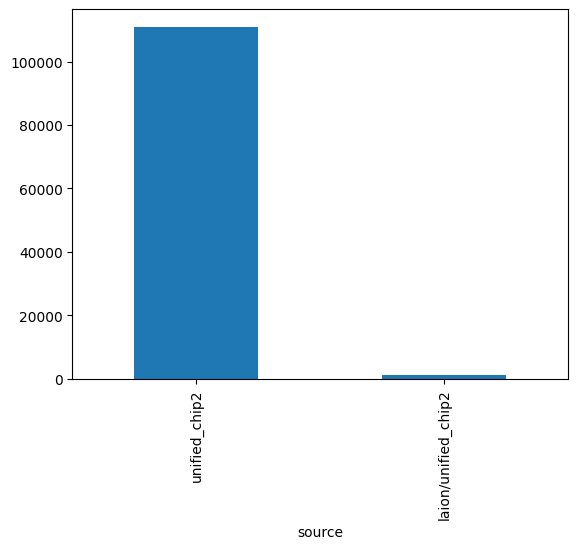

In [ ]:
training_df['source'].value_counts().plot(kind='bar')                      ##### Ï¢ÖÎ•òÎ≥ÑÎ∂ÑÎ•ò

In [ ]:
training_df.shape

(112097, 3)

<Axes: title={'center': 'Histogram of prompt Length'}, ylabel='Frequency'>

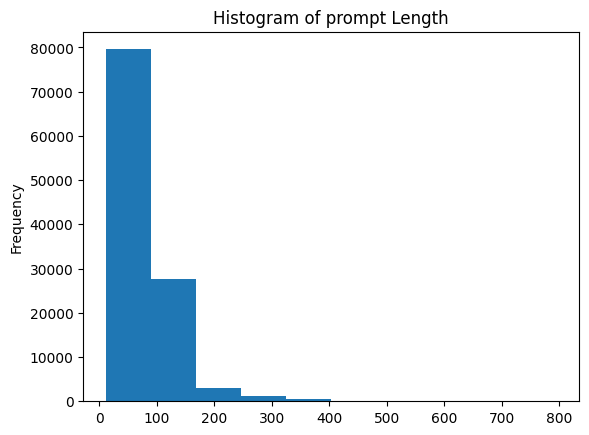

In [ ]:
training_df['prompt'].str.len().plot(kind='hist', title='Histogram of prompt Length')

<Axes: title={'center': 'Histogram of response Length'}, ylabel='Frequency'>

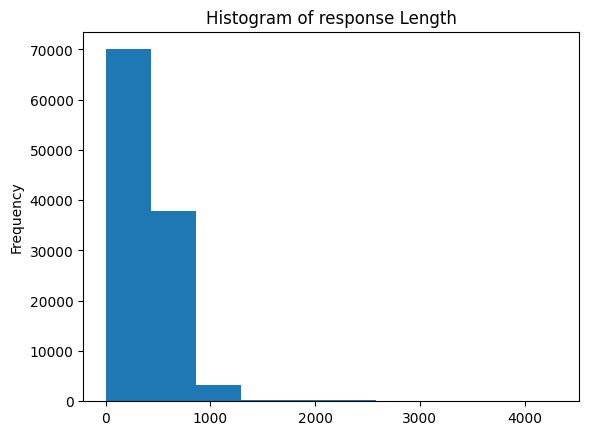

In [ ]:
training_df['response'].str.len().plot(kind='hist', title='Histogram of response Length')


  
# Î™®Îç∏ÌïôÏäµ ÏãúÏûë


In [ ]:
QUERY_KEY = "Question:"
RESPONSE_KEY = "Response:"
PAD_KEY = "<PAD>"


In [ ]:

MODEL = 'gpt2'

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# ÏÇ¨Ïö©ÏûêÌÜ†ÌÅ∞Ï†ïÏùò
# ÏùºÎ∞òÏ†ÅÏù∏ ÌäπÏàò ÌÜ†ÌÅ∞(e.g., <pad>, <cls>) Ïô∏Ïóê Ï∂îÍ∞ÄÎ°ú ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌäπÏàò ÌÜ†ÌÅ∞ÏùÑ Ìè¨Ìï®
# ÏßàÎ¨∏,ÎãµÎ≥ÄÏùÑ Íµ¨Î∂Ñ / Ïòà:"What is AI?"Î•º "<QUERY> What is AI?"Î°ú Î≥ÄÌôò. / ÏûÖÎ†• ÏãúÌÄÄÏä§Ïùò Í∏∏Ïù¥Î•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ Ìå®Îî© ÌÜ†ÌÅ∞ÏùÑ ÏÇ¨Ïö©
tokenizer.add_special_tokens({"additional_special_tokens": [QUERY_KEY, RESPONSE_KEY, PAD_KEY]})
tokenizer.pad_token = PAD_KEY


model = AutoModelForCausalLM.from_pretrained(MODEL)
model.config.pad_token = PAD_KEY
model.resize_token_embeddings(len(tokenizer))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(50260, 768)

In [ ]:
chip2_dataset = Dataset.from_pandas(training_df)                ##### ÌóàÍπÖÌéòÏù¥Ïä§ DatasetÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú pandas Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ï≤òÎ¶¨

# ÏÇ¨Ïö©ÏûêÌÜ†ÌÅ∞ Ï†ÅÏö©Ìï®Ïàò
def preprocess(example):
    return tokenizer(QUERY_KEY+ ' ' + example['prompt'] + '\n'+RESPONSE_KEY+' '+example['response']+tokenizer.eos_token)

chip2_dataset = chip2_dataset.map(
    preprocess, batched=False, batch_size=1024, remove_columns=chip2_dataset.features.keys()
)

# Í∏∏Ïù¥Ï°∞Ï†ïÌï®Ïàò
def filter_function(example):
    return len(example['input_ids']) <= 1024

chip2_dataset = chip2_dataset.filter(filter_function)

chip2_dataset = chip2_dataset.train_test_split(test_size=0.2, seed=seed)

Map:   0%|          | 0/112097 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1446 > 1024). Running this sequence through the model will result in indexing errors


Filter:   0%|          | 0/112097 [00:00<?, ? examples/s]

In [ ]:
chip2_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 89676
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 22419
    })
})

In [ ]:
print(tokenizer.decode(chip2_dataset['test']['input_ids'][13]))
print('-----')
print(tokenizer.decode(chip2_dataset['test']['input_ids'][14]))
print('-----')
print(tokenizer.decode(chip2_dataset['test']['input_ids'][63]))

Question: What is the name of the character played by Emily Blunt in the movie ‚ÄòThe Young Victoria‚Äô?
Response: Queen Victoria<|endoftext|>
-----
Question: How is a blockchain ledger used?
Response: A blockchain ledger is primarily used for recording and verifying transactions in a secure and decentralized manner. Every participant in the network has a copy of the ledger, creating transparency and traceability of all transactions. It is commonly used in cryptocurrencies and other financial applications, but can also have uses in supply chain management, voting systems, and more.<|endoftext|>
-----
Question: Can you give me an overview of the elements of the periodic table?
Response: The periodic table is a tabular arrangement of chemical elements based on their atomic number, electron configuration, and chemical properties. It is divided into rows called periods and columns called groups. There are currently 118 known elements, each with its unique set of properties. The elements ar

In [ ]:
len(chip2_dataset['test']['input_ids'][0])

102

In [ ]:
f'{model.num_parameters():,}'

'124,442,112'

In [ ]:
import wandb                  #### Î™®Îç∏ÌïôÏäµ Ï∂îÏ†Å, ÏãúÍ∞ÅÌôî
# Set up Weights and Biases integration
wandb.init(project="FFT") #b93a105e31d833b072c1f15f57a095f50c62e0d3


In [ ]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
print(torch.cuda.get_device_name(0))
if device.type == 'cuda':
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA A100-SXM4-40GB
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False,
    return_tensors="pt", pad_to_multiple_of=8
)

In [ ]:
from transformers import TrainingArguments, Trainer

##### Ïã§ÌóòÏÑ§Ï†ï Îã§Î•¥Í≤å 2Î≤àÎèåÎ¶º
training_args = TrainingArguments(
    output_dir="./fineframe_supervised_instruction",  # The output directory
    overwrite_output_dir=True,  # overwrite the content of the output directory
    num_train_epochs=1,  # number of training epochs
    per_device_train_batch_size=2,  # batch size for training
    per_device_eval_batch_size=4,  # batch size for evaluation
    gradient_accumulation_steps=16,  # steps for gradient accumulation
    load_best_model_at_end=True,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    report_to="all",
    seed=seed,
    fp16=True,  # enable mixed precision training for my GPU
)

# GPT2Î™®Îç∏ÏùÑ chip2Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌõàÎ†®ÏãúÌÇ®Îã§ (fine tuning)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=chip2_dataset['train'],
    eval_dataset=chip2_dataset['test'],
    data_collator=data_collator
)

trainer.evaluate()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


{'eval_loss': 2.9964849948883057,
 'eval_model_preparation_time': 0.0027,
 'eval_runtime': 80.2634,
 'eval_samples_per_second': 279.318,
 'eval_steps_per_second': 69.833}

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./fineframe",  # The output directory
    overwrite_output_dir=True,  # overwrite the content of the output directory
    num_train_epochs=1,  # number of training epochs
    per_device_train_batch_size=2,  # batch size for training
    per_device_eval_batch_size=4,  # batch size for evaluation
    gradient_accumulation_steps=16,  # steps for gradient accumulation
    logging_steps=50,
    learning_rate=2e-5,
    warmup_steps=100,
    load_best_model_at_end=True,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    report_to="all",
    seed=seed,
    fp16=True,  # enable mixed precision training for GPU
)

##### transformersÎùºÏù¥Î∏åÎü¨Î¶¨ TrainerÏóê Î™®Îç∏, args, Îç∞Ïù¥ÌÑ∞ÏÖã ÎÑ£Í≥† train
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=chip2_dataset['train'],
    eval_dataset=chip2_dataset['test'],
    data_collator=data_collator
)

trainer.evaluate()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


{'eval_loss': 2.9964849948883057,
 'eval_model_preparation_time': 0.0026,
 'eval_runtime': 80.6417,
 'eval_samples_per_second': 278.007,
 'eval_steps_per_second': 69.505}

In [ ]:
number_of_examples = len(chip2_dataset['train'])
per_device_train_batch_size = training_args.per_device_train_batch_size
gradient_accumulation_steps = training_args.gradient_accumulation_steps
num_train_epochs = training_args.num_train_epochs

effective_batch_size = per_device_train_batch_size * gradient_accumulation_steps
number_of_training_steps = (number_of_examples / effective_batch_size) * num_train_epochs

number_of_training_steps = int(number_of_training_steps / training_args.n_gpu)

print("Number of training steps:", number_of_training_steps)


Number of training steps: 2802


In [ ]:
training_args.warmup_steps = int(.1 * number_of_training_steps)

In [ ]:
trainer.train()

There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=2802, training_loss=2.181821067191974, metrics={'train_runtime': 1717.8187, 'train_samples_per_second': 52.203, 'train_steps_per_second': 1.631, 'total_flos': 6394844860416000.0, 'train_loss': 2.181821067191974, 'epoch': 0.9998661849324234})

In [ ]:
# Î™®Îç∏ Ï†ÄÏû•
model_save_path = "/content/drive/My Drive/fine tuning/trained_model"
tokenizer_save_path = "/content/drive/My Drive/fine tuning/trained_model/tokenizer"

trainer.save_model(model_save_path)

In [ ]:
tokenizer.save_pretrained(tokenizer_save_path)


('/content/drive/My Drive/fine tuning/trained_model/tokenizer/tokenizer_config.json',
 '/content/drive/My Drive/fine tuning/trained_model/tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/fine tuning/trained_model/tokenizer/vocab.json',
 '/content/drive/My Drive/fine tuning/trained_model/tokenizer/merges.txt',
 '/content/drive/My Drive/fine tuning/trained_model/tokenizer/added_tokens.json',
 '/content/drive/My Drive/fine tuning/trained_model/tokenizer/tokenizer.json')

**Î™®Îç∏ÏùÑ Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏åÏóê Ï†ÄÏû•ÎêúÍ≤ÉÏùÑ Î∂àÎü¨Ïò¥**




In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Ï†ÄÏû•Îêú Í≤ΩÎ°ú
model_load_path = "/content/drive/My Drive/fine tuning/trained_model"
tokenizer_load_path = "/content/drive/My Drive/fine tuning/trained_model/tokenizer"

# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
model = AutoModelForCausalLM.from_pretrained(model_load_path)    # Ï≤òÏùåÏóî model = AutoModelForCausalLM.from_pretrained("GPT2")
# Î™®Îç∏ÏÇ¨Ïö© Î™©Ï†ÅÏù¥Îã§Î¶Ñ, CausalLM Î™®Îç∏ÏùÄ Ïñ∏Ïñ¥ ÏÉùÏÑ±Ïóê ÌïÑÏöîÌïú ÏûêÎèô ÌöåÍ∑Ä Î∞©ÏãùÏúºÎ°ú ÌïôÏäµÎê©ÎãàÎã§.
# Sequence Classification Î™®Îç∏ÏùÄ Î∂ÑÎ•ò ÏûëÏóÖÏùÑ ÏúÑÌïú ÏóîÎìú Ìà¨ ÏóîÎìú Î∂ÑÎ•ò Íµ¨Ï°∞Î°ú ÌïôÏäµÎê©ÎãàÎã§. AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained(tokenizer_load_path)

### Loss drops dramatically which is expected when we introduce new tokens
